In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('EXAMPLE').getOrCreate()

In [77]:
# Reading a CSV file into DataFrame

sample_df = spark.read.csv('C:/Users/Lenovo/Desktop/test.csv')

In [78]:
sample_df.show()

+---+---+---+---+---------------+
|_c0|_c1|_c2|_c3|            _c4|
+---+---+---+---+---------------+
|5.1|3.5|1.4|0.2|    Iris-setosa|
|4.9|  3|1.4|0.2|    Iris-setosa|
|4.7|3.2|1.3|0.2|    Iris-setosa|
|4.6|3.1|1.5|0.2|    Iris-setosa|
|  5|3.6|1.4|0.2|    Iris-setosa|
|5.4|3.9|1.7|0.4|    Iris-setosa|
|4.6|3.4|1.4|0.3|    Iris-setosa|
|  5|3.4|1.5|0.2|    Iris-setosa|
|  7|3.2|4.7|1.4|Iris-versicolor|
|6.4|3.2|4.5|1.5|Iris-versicolor|
|6.9|3.1|4.9|1.5|Iris-versicolor|
|5.5|2.3|  4|1.3|Iris-versicolor|
|6.5|2.8|4.6|1.5|Iris-versicolor|
|5.7|2.8|4.5|1.3|Iris-versicolor|
|6.3|3.3|4.7|1.6|Iris-versicolor|
|4.9|2.4|3.3|  1|Iris-versicolor|
|6.6|2.9|4.6|1.3|Iris-versicolor|
|5.2|2.7|3.9|1.4|Iris-versicolor|
|  5|  2|3.5|  1|Iris-versicolor|
|5.9|  3|4.2|1.5|Iris-versicolor|
+---+---+---+---+---------------+
only showing top 20 rows



In [81]:
# Count - To count the number of rows in DataFrame
sample_df.count()

35

In [82]:
# Type - To find the datatype of single column
# dtype - To find the datatypes of all columns in a dataframe

type(sample_df)

pyspark.sql.dataframe.DataFrame

In [83]:
# To assign column names to our dataframe

sample_df = sample_df.toDF('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'classes')

sample_df.printSchema()

root
 |-- sepal_length: string (nullable = true)
 |-- sepal_width: string (nullable = true)
 |-- petal_length: string (nullable = true)
 |-- petal_width: string (nullable = true)
 |-- classes: string (nullable = true)



In [84]:
type(sample_df)

pyspark.sql.dataframe.DataFrame

In [85]:
# Where - to filter the records
# alternative to filter
# Type 1 df.filter(df.age > 3).collect()
# Type 2 df.filter("age > 3").collect()

query_1 = sample_df.where(sample_df.petal_width > 1).select(sample_df.sepal_length, sample_df.petal_length)

In [86]:
query_1.show()

+------------+------------+
|sepal_length|petal_length|
+------------+------------+
|         5.7|           5|
|         5.8|         5.1|
|         6.4|         5.3|
|         7.7|         6.7|
|         7.7|         6.9|
|         6.9|         5.7|
|         5.6|         4.9|
|         7.7|         6.7|
|         6.7|         5.7|
+------------+------------+



In [87]:
# Using AND operator in Where condition

query_1 = sample_df.where((sample_df.petal_width > 0.2) & (sample_df.classes == "Iris-setosa")).select(sample_df.sepal_length, sample_df.petal_length)   

In [88]:
query_1.show()

+------------+------------+
|sepal_length|petal_length|
+------------+------------+
|         5.4|         1.7|
|         4.6|         1.4|
+------------+------------+



In [91]:
# finding Mean and Count using Group By and storing to result in newly created Alias column

from pyspark.sql import functions as F

query_2 = sample_df.groupBy(sample_df.classes).agg(F.mean(sample_df.sepal_length).alias("sepal_length_mean"),
                               F.count(sample_df.sepal_length).alias("sepal_length_count"))

In [92]:
query_2

DataFrame[classes: string, sepal_length_mean: double, sepal_length_count: bigint]

In [93]:
query_2.show()

+---------------+------------------+------------------+
|        classes| sepal_length_mean|sepal_length_count|
+---------------+------------------+------------------+
| Iris-virginica|6.6000000000000005|                14|
|    Iris-setosa|            4.9125|                 8|
|Iris-versicolor| 5.992307692307692|                13|
+---------------+------------------+------------------+



In [94]:
type(query_2)

pyspark.sql.dataframe.DataFrame

In [96]:
# Join using smaple_df and query_2
# Note: Error will be thrown if key column from both tables are same

join_df = sample_df.join(query_2, query_2.classes == sample_df.classes)

In [97]:
join_df = sample_df.join(query_2, "classes")

In [98]:
type(join_df)

pyspark.sql.dataframe.DataFrame

In [99]:
join_df.show(100,False)

+---------------+------------+-----------+------------+-----------+------------------+------------------+
|classes        |sepal_length|sepal_width|petal_length|petal_width|sepal_length_mean |sepal_length_count|
+---------------+------------+-----------+------------+-----------+------------------+------------------+
|Iris-setosa    |5.1         |3.5        |1.4         |0.2        |4.9125            |8                 |
|Iris-setosa    |4.9         |3          |1.4         |0.2        |4.9125            |8                 |
|Iris-setosa    |4.7         |3.2        |1.3         |0.2        |4.9125            |8                 |
|Iris-setosa    |4.6         |3.1        |1.5         |0.2        |4.9125            |8                 |
|Iris-setosa    |5           |3.6        |1.4         |0.2        |4.9125            |8                 |
|Iris-setosa    |5.4         |3.9        |1.7         |0.4        |4.9125            |8                 |
|Iris-setosa    |4.6         |3.4        |1.4 

In [100]:
join_df.count()

35

In [101]:
join_df.cache()

DataFrame[classes: string, sepal_length: string, sepal_width: string, petal_length: string, petal_width: string, sepal_length_mean: double, sepal_length_count: bigint]

In [103]:
# Could also use 'left_outer'
# here join key column is "classes" for both dataframes. So mentoin it once inside inverted commas to avoid errors 

left_join_df = sample_df.join(query_2, "classes", how='left') 
left_join_df.show(150,False)

+---------------+------------+-----------+------------+-----------+------------------+------------------+
|classes        |sepal_length|sepal_width|petal_length|petal_width|sepal_length_mean |sepal_length_count|
+---------------+------------+-----------+------------+-----------+------------------+------------------+
|Iris-setosa    |5.1         |3.5        |1.4         |0.2        |4.9125            |8                 |
|Iris-setosa    |4.9         |3          |1.4         |0.2        |4.9125            |8                 |
|Iris-setosa    |4.7         |3.2        |1.3         |0.2        |4.9125            |8                 |
|Iris-setosa    |4.6         |3.1        |1.5         |0.2        |4.9125            |8                 |
|Iris-setosa    |5           |3.6        |1.4         |0.2        |4.9125            |8                 |
|Iris-setosa    |5.4         |3.9        |1.7         |0.4        |4.9125            |8                 |
|Iris-setosa    |4.6         |3.4        |1.4 

In [104]:
left_join_df.count()

35

In [105]:
# Could also use 'left_outer'

right_join_df = sample_df.join(query_2, "classes",how='right') 
right_join_df.show(150,False)

+---------------+------------+-----------+------------+-----------+------------------+------------------+
|classes        |sepal_length|sepal_width|petal_length|petal_width|sepal_length_mean |sepal_length_count|
+---------------+------------+-----------+------------+-----------+------------------+------------------+
|Iris-virginica |6.2         |2.8        |4.8         |1.8        |6.6000000000000005|14                |
|Iris-virginica |7.2         |3.2        |6           |1.8        |6.6000000000000005|14                |
|Iris-virginica |6.7         |3.3        |5.7         |2.1        |6.6000000000000005|14                |
|Iris-virginica |6.3         |2.7        |4.9         |1.8        |6.6000000000000005|14                |
|Iris-virginica |7.7         |2.8        |6.7         |2          |6.6000000000000005|14                |
|Iris-virginica |5.6         |2.8        |4.9         |2          |6.6000000000000005|14                |
|Iris-virginica |6.9         |3.2        |5.7 

In [108]:
# Right join

right_join_df.count()

35

In [110]:
# Could also use 'full_outer'

full_outer_join_df = sample_df.join(query_2, "classes",how='full') 
full_outer_join_df.show(150,False)

+---------------+------------+-----------+------------+-----------+------------------+------------------+
|classes        |sepal_length|sepal_width|petal_length|petal_width|sepal_length_mean |sepal_length_count|
+---------------+------------+-----------+------------+-----------+------------------+------------------+
|Iris-virginica |5.7         |2.5        |5           |2          |6.6000000000000005|14                |
|Iris-virginica |5.8         |2.8        |5.1         |2.4        |6.6000000000000005|14                |
|Iris-virginica |6.4         |3.2        |5.3         |2.3        |6.6000000000000005|14                |
|Iris-virginica |6.5         |3          |5.5         |1.8        |6.6000000000000005|14                |
|Iris-virginica |7.7         |3.8        |6.7         |2.2        |6.6000000000000005|14                |
|Iris-virginica |7.7         |2.6        |6.9         |2.3        |6.6000000000000005|14                |
|Iris-virginica |6           |2.2        |5   

In [111]:
full_outer_join_df.count()

35

In [ ]:
# Cross join

#df.crossJoin(df2.select("height")).select("age", "name", "height").collect()

#sample_df.crossJoin(query_2.select("classes")).select("sepal_length","sepal_width").collect()

In [ ]:
#cross_join_df.display()

In [112]:
# Crosstab
# first colummn(petal_length) will be made distinct and then second column(sepal_length) gives the count of values in that column  

query_1.stat.crosstab("petal_length", "sepal_length").show()

+-------------------------+---+---+
|petal_length_sepal_length|4.6|5.4|
+-------------------------+---+---+
|                      1.4|  1|  0|
|                      1.7|  0|  1|
+-------------------------+---+---+



In [113]:
# cast # Typcasting
# astype

typecast_df = sample_df.select(sample_df.petal_length.cast("integer"), sample_df.sepal_length.cast("integer"))

In [114]:
display(typecast_df)

DataFrame[petal_length: int, sepal_length: int]

In [115]:
# Mean, Min, Max

typecast_df.select([min("petal_length"), max("petal_length")]).show()

+-----------------+-----------------+
|min(petal_length)|max(petal_length)|
+-----------------+-----------------+
|                1|                6|
+-----------------+-----------------+



In [128]:
# Random number generation

from pyspark.sql.functions import rand, randn

numeric_df = sqlContext.range(0, 10).withColumn('uniform', rand(seed=10)).withColumn('normal', randn(seed=27))

In [129]:
numeric_df.show()

+---+-------------------+--------------------+
| id|            uniform|              normal|
+---+-------------------+--------------------+
|  0|0.41371264720975787|  0.5888539012978773|
|  1| 0.7311719281896606|  0.8645537008427937|
|  2| 0.1982919638208397| 0.06157382353970104|
|  3|0.12714181165849525|  0.3623040918178586|
|  4| 0.7604318153406678|-0.49575204523675975|
|  5|0.12030715258495939|  1.0854146699817222|
|  6|0.12131363910425985| -0.5284523629183004|
|  7|0.44292918521277047| -0.4798519469521663|
|  8| 0.8898784253886249| -0.8820294772950535|
|  9|0.03650707717266999| -2.1591956435415334|
+---+-------------------+--------------------+



In [121]:
numeric_df.describe().show()

+-------+------------------+-------------------+--------------------+
|summary|                id|            uniform|              normal|
+-------+------------------+-------------------+--------------------+
|  count|                10|                 10|                  10|
|   mean|               4.5| 0.3841685645682706|-0.15825812884638607|
| stddev|3.0276503540974917|0.31309395532409323|   0.963345903544872|
|    min|                 0|0.03650707717266999| -2.1591956435415334|
|    max|                 9| 0.8898784253886249|  1.0854146699817222|
+-------+------------------+-------------------+--------------------+



In [122]:
from pyspark.sql.functions import mean, min, max

numeric_df.select([mean('uniform'), min('uniform'), max('uniform')]).show()

+------------------+-------------------+------------------+
|      avg(uniform)|       min(uniform)|      max(uniform)|
+------------------+-------------------+------------------+
|0.3841685645682706|0.03650707717266999|0.8898784253886249|
+------------------+-------------------+------------------+



In [123]:
numeric_df.show()

+---+-------------------+--------------------+
| id|            uniform|              normal|
+---+-------------------+--------------------+
|  0|0.41371264720975787|  0.5888539012978773|
|  1| 0.7311719281896606|  0.8645537008427937|
|  2| 0.1982919638208397| 0.06157382353970104|
|  3|0.12714181165849525|  0.3623040918178586|
|  4| 0.7604318153406678|-0.49575204523675975|
|  5|0.12030715258495939|  1.0854146699817222|
|  6|0.12131363910425985| -0.5284523629183004|
|  7|0.44292918521277047| -0.4798519469521663|
|  8| 0.8898784253886249| -0.8820294772950535|
|  9|0.03650707717266999| -2.1591956435415334|
+---+-------------------+--------------------+



In [126]:
numeric_df.columns

['id', 'uniform', 'normal']

# Views
#createGlobalTempView
#createOrReplaceTempView
#createTempView

numeric_df.createGlobalTempView("numeric_tab")
df2 = spark.sql("select * from global_temp.numeric_tab")
df2.show()

In [79]:
# describe for one column

numeric_df.describe(['uniform']).show()

+-------+-------------------+
|summary|            uniform|
+-------+-------------------+
|  count|                 10|
|   mean| 0.3841685645682706|
| stddev|0.31309395532409323|
|    min|0.03650707717266999|
|    max| 0.8898784253886249|
+-------+-------------------+



In [130]:
# describe for all columns in a dataframe

numeric_df.describe().show()

+-------+------------------+-------------------+--------------------+
|summary|                id|            uniform|              normal|
+-------+------------------+-------------------+--------------------+
|  count|                10|                 10|                  10|
|   mean|               4.5| 0.3841685645682706|-0.15825812884638607|
| stddev|3.0276503540974917|0.31309395532409323|   0.963345903544872|
|    min|                 0|0.03650707717266999| -2.1591956435415334|
|    max|                 9| 0.8898784253886249|  1.0854146699817222|
+-------+------------------+-------------------+--------------------+



In [131]:
# Distinct

sample_df.distinct().count()

35

In [132]:
# Distinct for one particular column

sample_df.select('classes').distinct().count()

3

In [133]:
drop_df = numeric_df.drop('id')

In [134]:
type(drop_df)

pyspark.sql.dataframe.DataFrame

In [135]:
drop_df.show()

+-------------------+--------------------+
|            uniform|              normal|
+-------------------+--------------------+
|0.41371264720975787|  0.5888539012978773|
| 0.7311719281896606|  0.8645537008427937|
| 0.1982919638208397| 0.06157382353970104|
|0.12714181165849525|  0.3623040918178586|
| 0.7604318153406678|-0.49575204523675975|
|0.12030715258495939|  1.0854146699817222|
|0.12131363910425985| -0.5284523629183004|
|0.44292918521277047| -0.4798519469521663|
| 0.8898784253886249| -0.8820294772950535|
|0.03650707717266999| -2.1591956435415334|
+-------------------+--------------------+



In [137]:
# here toDF() is used to convert a list of rows into a DataFrame
# toDF() is also used to give column names to a DataFrame
# Drop duplicate records in a dataframe

from pyspark.sql import Row
duplicate_df = sc.parallelize([ \
     Row(name='Alice', age=5, height=80), \
     Row(name='Alice', age=5, height=80), \
     Row(name='Alice', age=10, height=80)]).toDF()
duplicate_df.show()

+---+------+-----+
|age|height| name|
+---+------+-----+
|  5|    80|Alice|
|  5|    80|Alice|
| 10|    80|Alice|
+---+------+-----+



In [138]:
remove_duplicate_df = duplicate_df.dropDuplicates()
remove_duplicate_df.show()

+---+------+-----+
|age|height| name|
+---+------+-----+
|  5|    80|Alice|
| 10|    80|Alice|
+---+------+-----+



In [139]:
# Drop null value records in a dataframe

duplicate_df.na.drop().show()

+---+------+-----+
|age|height| name|
+---+------+-----+
|  5|    80|Alice|
|  5|    80|Alice|
| 10|    80|Alice|
+---+------+-----+



In [140]:
# To find the datatype of all columns in a dataframe

duplicate_df.dtypes

[('age', 'bigint'), ('height', 'bigint'), ('name', 'string')]

In [141]:
duplicate_df.explain()

== Physical Plan ==
Scan ExistingRDD[age#1795L,height#1796L,name#1797]


In [142]:
# Select columns
duplicate_df.select(duplicate_df.name, (duplicate_df.age + 10).alias('new_age')).collect()

[Row(name='Alice', new_age=15),
 Row(name='Alice', new_age=15),
 Row(name='Alice', new_age=20)]

In [143]:
# Sorting columns
duplicate_df.sort(duplicate_df.age.desc()).collect()

[Row(age=10, height=80, name='Alice'),
 Row(age=5, height=80, name='Alice'),
 Row(age=5, height=80, name='Alice')]

In [144]:
# To fetch the first n rows

duplicate_df.take(2)

[Row(age=5, height=80, name='Alice'), Row(age=5, height=80, name='Alice')]

In [145]:
# Converts a dataframe to JSON
# and also fetch the first row using first()

duplicate_df.toJSON().first()

'{"age":5,"height":80,"name":"Alice"}'

In [146]:
# Converting a PySpark DataFrame to Pandas DataFrame
# Note This method should only be used if the resulting Pandas’s DataFrame is expected to be small, as all the data is loaded into the driver’s memory.

duplicate_df.toPandas()

,age,height,name
0,5,80,Alice
1,5,80,Alice
2,10,80,Alice


In [118]:
# Pivot

In [119]:
# between with inclusive range

duplicate_df.select(duplicate_df.name, duplicate_df.age.between(2, 4)).show()

+-----+---------------------------+
| name|((age >= 2) AND (age <= 4))|
+-----+---------------------------+
|Alice|                      false|
|Alice|                      false|
|Alice|                      false|
+-----+---------------------------+



In [120]:
# Structfield
# getField

In [147]:
# Case # When
# otherwise
#from pyspark.sql import functions as F

duplicate_df.select(duplicate_df.name, F.when(duplicate_df.age > 3, 1).otherwise(0)).show()

+-----+-------------------------------------+
| name|CASE WHEN (age > 3) THEN 1 ELSE 0 END|
+-----+-------------------------------------+
|Alice|                                    1|
|Alice|                                    1|
|Alice|                                    1|
+-----+-------------------------------------+



In [1]:
# substr

In [149]:
# Row 

from pyspark.sql import *

department1 = Row(id='123456', name='Computer Science')
department2 = Row(id='789012', name='Mechanical Engineering')
department3 = Row(id='345678', name='Theater and Drama')
department4 = Row(id='901234', name='Indoor Recreation')

In [150]:
type(department1)

pyspark.sql.types.Row

In [151]:
Employee = Row("firstName", "lastName", "email", "salary")
employee1 = Employee('michael', 'armbrust', 'no-reply@berkeley.edu', 100000)
employee2 = Employee('xiangrui', 'meng', 'no-reply@stanford.edu', 120000)
employee3 = Employee('matei', None, 'no-reply@waterloo.edu', 140000)
employee4 = Employee('matei', None, 'no-reply@waterloo.edu', 140000)

In [152]:
type(employee1)

pyspark.sql.types.Row

In [153]:
departmentWithEmployees1 = Row(department=department1, employees=[employee1, employee2])
departmentWithEmployees2 = Row(department=department2, employees=[employee3, employee4])
departmentWithEmployees3 = Row(department=department3, employees=[employee1, employee4])
departmentWithEmployees4 = Row(department=department4, employees=[employee2, employee3])

In [154]:
# Creating DataFrame from list of Rows

departmentsWithEmployeesSeq1 = [departmentWithEmployees1, departmentWithEmployees2]
df1 = spark.createDataFrame(departmentsWithEmployeesSeq1)

display(df1)

departmentsWithEmployeesSeq2 = [departmentWithEmployees3, departmentWithEmployees4]
df2 = spark.createDataFrame(departmentsWithEmployeesSeq2)

display(df2)

DataFrame[department: struct<id:string,name:string>, employees: array<struct<firstName:string,lastName:string,email:string,salary:bigint>>]

DataFrame[department: struct<id:string,name:string>, employees: array<struct<firstName:string,lastName:string,email:string,salary:bigint>>]

In [156]:
df1.show()

+--------------------+--------------------+
|          department|           employees|
+--------------------+--------------------+
|[123456,Computer ...|[[michael,armbrus...|
|[789012,Mechanica...|[[matei,null,no-r...|
+--------------------+--------------------+



In [157]:
df2.show()

+--------------------+--------------------+
|          department|           employees|
+--------------------+--------------------+
|[345678,Theater a...|[[michael,armbrus...|
|[901234,Indoor Re...|[[xiangrui,meng,n...|
+--------------------+--------------------+



In [158]:
# Union

unionDF = df1.unionAll(df2)
display(unionDF)

DataFrame[department: struct<id:string,name:string>, employees: array<struct<firstName:string,lastName:string,email:string,salary:bigint>>]

In [159]:
unionDF.show()

+--------------------+--------------------+
|          department|           employees|
+--------------------+--------------------+
|[123456,Computer ...|[[michael,armbrus...|
|[789012,Mechanica...|[[matei,null,no-r...|
|[345678,Theater a...|[[michael,armbrus...|
|[901234,Indoor Re...|[[xiangrui,meng,n...|
+--------------------+--------------------+



In [224]:
# assigning column names using selectExpr

from pyspark.sql import *
from pyspark.sql.functions import explode
df = unionDF.select(explode("employees").alias("e"))
explodeDF = df.selectExpr("e.firstName", "e.lastName", "e.email", "e.salary")

explodeDF.show()

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
|  michael|armbrust|no-reply@berkeley...|100000|
| xiangrui|    meng|no-reply@stanford...|120000|
|    matei|    null|no-reply@waterloo...|140000|
|    matei|    null|no-reply@waterloo...|140000|
|  michael|armbrust|no-reply@berkeley...|100000|
|    matei|    null|no-reply@waterloo...|140000|
| xiangrui|    meng|no-reply@stanford...|120000|
|    matei|    null|no-reply@waterloo...|140000|
+---------+--------+--------------------+------+



In [207]:
# filter 1

filterDF = explodeDF.filter(explodeDF.firstName == "xiangrui").sort(explodeDF.lastName)
display(filterDF)
filterDF.show()

DataFrame[firstName: string, lastName: string, email: string, salary: bigint]

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
| xiangrui|    meng|no-reply@stanford...|120000|
| xiangrui|    meng|no-reply@stanford...|120000|
+---------+--------+--------------------+------+



In [208]:
# filter 2
from pyspark.sql.functions import col

filterDF = explodeDF.filter(col("firstName") == "xiangrui").sort(explodeDF.lastName)
filterDF.show()

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
| xiangrui|    meng|no-reply@stanford...|120000|
| xiangrui|    meng|no-reply@stanford...|120000|
+---------+--------+--------------------+------+



In [209]:
# Where - alternative of Filter
from pyspark.sql.functions import col, asc

whereDF = explodeDF.where((col("firstName") == "xiangrui") | (col("firstName") == "michael")).sort(asc("lastName"))
display(whereDF)
whereDF.show()

DataFrame[firstName: string, lastName: string, email: string, salary: bigint]

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
|  michael|armbrust|no-reply@berkeley...|100000|
|  michael|armbrust|no-reply@berkeley...|100000|
| xiangrui|    meng|no-reply@stanford...|120000|
| xiangrui|    meng|no-reply@stanford...|120000|
+---------+--------+--------------------+------+



In [210]:
from pyspark.sql.functions import col, asc
#Or
# Use `|` instead of `or`
filterDF = explodeDF.filter((col("firstName") == "xiangrui") | (col("firstName") == "michael")).sort(asc("lastName"))
display(filterDF)

DataFrame[firstName: string, lastName: string, email: string, salary: bigint]

In [211]:
# Replacing null with 'x' values

nonNullDF = explodeDF.fillna("--")
display(nonNullDF)
nonNullDF.show()

DataFrame[firstName: string, lastName: string, email: string, salary: bigint]

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
|  michael|armbrust|no-reply@berkeley...|100000|
| xiangrui|    meng|no-reply@stanford...|120000|
|    matei|      --|no-reply@waterloo...|140000|
|    matei|      --|no-reply@waterloo...|140000|
|  michael|armbrust|no-reply@berkeley...|100000|
|    matei|      --|no-reply@waterloo...|140000|
| xiangrui|    meng|no-reply@stanford...|120000|
|    matei|      --|no-reply@waterloo...|140000|
+---------+--------+--------------------+------+



In [212]:
# Fiterter out null value columns

filterNonNullDF = explodeDF.filter(col("firstName").isNull() | col("lastName").isNull()).sort("email")
display(filterNonNullDF)
filterNonNullDF.show()

DataFrame[firstName: string, lastName: string, email: string, salary: bigint]

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
|    matei|    null|no-reply@waterloo...|140000|
|    matei|    null|no-reply@waterloo...|140000|
|    matei|    null|no-reply@waterloo...|140000|
|    matei|    null|no-reply@waterloo...|140000|
+---------+--------+--------------------+------+



In [213]:
# Count distinct

from pyspark.sql.functions import countDistinct

countDistinctDF = explodeDF.select("firstName", "lastName")\
  .groupBy("firstName", "lastName")\
  .agg(countDistinct("firstName"))



In [214]:
countDistinctDF.show()

+---------+--------+-------------------------+
|firstName|lastName|count(DISTINCT firstName)|
+---------+--------+-------------------------+
|    matei|    null|                        1|
| xiangrui|    meng|                        1|
|  michael|armbrust|                        1|
+---------+--------+-------------------------+



In [215]:
# register the DataFrame as a temp table so that we can query it using SQL
explodeDF.registerTempTable("df_example")

In [216]:
# Perform the same query as the DataFrame above and return ``explain``
countDistinctDF_sql = spark.sql("SELECT firstName, lastName, count(distinct firstName) as distinct_first_names FROM df_example GROUP BY firstName, lastName")


In [217]:
countDistinctDF_sql.show()

+---------+--------+--------------------+
|firstName|lastName|distinct_first_names|
+---------+--------+--------------------+
|    matei|    null|                   1|
| xiangrui|    meng|                   1|
|  michael|armbrust|                   1|
+---------+--------+--------------------+



In [173]:
salarySumDF = explodeDF.agg({"salary" : "sum"})
display(salarySumDF)

DataFrame[sum(salary): bigint]

In [174]:
salarySumDF.show()

+-----------+
|sum(salary)|
+-----------+
|    1000000|
+-----------+



In [175]:
type(explodeDF.salary)

pyspark.sql.column.Column

In [176]:
# Descriptive statistics of a column

explodeDF.describe("salary").show()

+-------+------------------+
|summary|            salary|
+-------+------------------+
|  count|                 8|
|   mean|          125000.0|
| stddev|17728.105208558365|
|    min|            100000|
|    max|            140000|
+-------+------------------+



<Figure size 432x288 with 0 Axes>

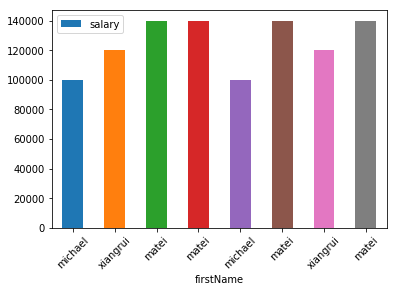

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
plt.clf()
pdDF = nonNullDF.toPandas()
pdDF.plot(x='firstName', y='salary', kind='bar', rot=45)


In [178]:
import numpy as np

random_numbers = sc.parallelize([np.random.rand() for _ in range(1000)], 4)

In [179]:
random_numbers

ParallelCollectionRDD[711] at parallelize at PythonRDD.scala:540

In [180]:
random_numbers.take(2)

[0.18610008856633709, 0.5846345890554729]

In [219]:
df.show()

+--------------------+
|                   e|
+--------------------+
|[michael,armbrust...|
|[xiangrui,meng,no...|
|[matei,null,no-re...|
|[matei,null,no-re...|
|[michael,armbrust...|
|[matei,null,no-re...|
|[xiangrui,meng,no...|
|[matei,null,no-re...|
+--------------------+



In [240]:
test_df = spark.read.csv('C:/Users/Lenovo/Desktop/details.csv', header = True)

In [242]:
# String concatenation with delimiter

from pyspark.sql.functions import concat, col, lit

df_concat = test_df.select(concat(test_df.employee, lit(" "), test_df.country))

In [243]:

df_concat.show()

+----------------------------+
|concat(employee,  , country)|
+----------------------------+
|                 shiva india|
|             vicky Singapore|
|                varun Canada|
|             arun  Singapore|
|               hemanth India|
|                yugesh India|
|                   satish US|
+----------------------------+



In [244]:
from pyspark.sql.functions import asc
df_asc = test_df.orderBy(asc("employee"))
df_asc.show()

+--------+--------+---+---------+-----------------+
|employee|   phone|age|  country|           school|
+--------+--------+---+---------+-----------------+
|   arun |11111111| 25|Singapore|              smu|
| hemanth|22443355| 27|    India|  anna university|
|  satish|99884400| 27|       US|              ssn|
|   shiva|84386483| 27|    india|              nus|
|   varun|99999999| 27|   Canada|              ntu|
|   vicky|88888888| 31|Singapore|              nus|
|  yugesh|33441122| 27|    India|meenakshi college|
+--------+--------+---+---------+-----------------+



In [246]:
# Selecting a particular column

test_df.select("age").show()

+---+
|age|
+---+
| 27|
| 31|
| 27|
| 25|
| 27|
| 27|
| 27|
+---+



In [58]:
# denserank

#The difference between rank and denseRank is that denseRank leaves no gaps in ranking sequence when there are ties. 
#That is, if you were ranking a competition using denseRank and had three people tie for second place, 
#you would say that all three were in second place and that the next person came in third.

In [188]:
# Coalesce - returns the first non Null value

cDf = spark.createDataFrame([(None, None), (1, None), (None, 2)], ("a", "b"))
cDf.show()

+----+----+
|   a|   b|
+----+----+
|null|null|
|   1|null|
|null|   2|
+----+----+



In [189]:
from pyspark.sql.functions import coalesce
cDf.select(coalesce(cDf["a"], cDf["b"])).show()

+--------------+
|coalesce(a, b)|
+--------------+
|          null|
|             1|
|             2|
+--------------+



In [190]:
# retuns the first non Null value else the the mentioned literal

cDf.select('*', coalesce(cDf["a"], lit(0.0))).show()

+----+----+----------------+
|   a|   b|coalesce(a, 0.0)|
+----+----+----------------+
|null|null|             0.0|
|   1|null|             1.0|
|null|   2|             0.0|
+----+----+----------------+



In [191]:
# Concatenation of string

before_df = spark.createDataFrame([('abcd','123')], ['s', 'd'])

In [202]:
before_df.show()

+----+---+
|   s|  d|
+----+---+
|abcd|123|
+----+---+



In [193]:
before_df.select(concat(before_df.s, before_df.d).alias('s')).collect()

[Row(s='abcd123')]

In [194]:
### Concatenation of string using a delimiter

from pyspark.sql.functions import *

before_df.select(concat_ws('-', before_df.s, before_df.d).alias('s')).collect()

[Row(s='abcd-123')]

In [195]:
# greatest among the list of columns

greatest_df = spark.createDataFrame([(1, 4, 3)], ['a', 'b', 'c'])
greatest_df.select(greatest(greatest_df.a, greatest_df.b, greatest_df.c).alias("greatest")).collect()


[Row(greatest=4)]

In [196]:
# Loading a text file into a DataFrame

text_df = spark.read.text('C:/Users/Lenovo/Desktop/vig_elective_selection.txt')
text_df.collect()

[Row(value='SG4205 Information Systems Security'),
 Row(value='EB5203 Customer Relationship Management'),
 Row(value=''),
 Row(value=''),
 Row(value='KE5207 Computational Intelligence II'),
 Row(value='EB5202 Web Analytics')]

In [197]:
text_df.show()

+--------------------+
|               value|
+--------------------+
|SG4205 Informatio...|
|EB5203 Customer R...|
|                    |
|                    |
|KE5207 Computatio...|
|EB5202 Web Analytics|
+--------------------+



In [198]:
# Calculate power values

from pyspark.sql import Row
from pyspark.sql.functions import pow, col

row = Row("col1", "col2")
power_df = sc.parallelize([row(1, 2), row(2, 3), row(3, 3)]).toDF()

power_df.select("*", pow(col("col1"), col("col2")).alias("pow")).show()

+----+----+----+
|col1|col2| pow|
+----+----+----+
|   1|   2| 1.0|
|   2|   3| 8.0|
|   3|   3|27.0|
+----+----+----+



In [199]:
# Loading a JSON file into DataFrame

from pyspark.sql.types import *

data = [(1, '''{"a": 1}''')]
schema = StructType([StructField("a", IntegerType())])
json_df = spark.createDataFrame(data, ("key", "value"))
json_df.select(from_json(json_df.value, schema).alias("json")).collect()

[Row(json=Row(a=1))]